# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [13]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [23]:
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [15]:
print(df[df["STATE"] == 'MICHIGAN']["AVG_MATH_4_SCORE"].mean())
print(df[df["STATE"] == 'OHIO']["AVG_MATH_4_SCORE"].mean())

234.36363636363637
239.45454545454547


Find the average for your chosen test across all states in 2019

In [16]:
print(df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean())

239.9433962264151


For each state, find a maximum value for your chosen test score

In [17]:
df_by_states = df.groupby("STATE")
print(df_by_states["AVG_MATH_4_SCORE"].max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [18]:
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   
5    1992_COLORADO    COLORADO  1992     NaN      3185173.0         163253.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   
5      1307986.0      1713934.0          3264826.0                1642466.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

In [19]:
df.dropna(subset=['ENROLL'], inplace=True)
df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["ENROLL"]
df["revenue_per_student"] = df["TOTAL_REVENUE"] / df["ENROLL"]

print(df[["STATE", "expenditure_per_student", "revenue_per_student"]])

              STATE  expenditure_per_student  revenue_per_student
408         ALABAMA                 6.852063             6.691350
410         ARIZONA                 6.623893             6.724498
411        ARKANSAS                 5.953176             6.311367
412      CALIFORNIA                 7.712920             7.847296
414     CONNECTICUT                10.568761            11.094435
...             ...                      ...                  ...
1219       VIRGINIA                12.589755            12.389978
1220     WASHINGTON                12.710424            12.784377
1221  WEST_VIRGINIA                12.401341            12.442191
1222      WISCONSIN                13.406246            13.503366
1223        WYOMING                20.693172            20.911225

[398 rows x 3 columns]


Feature engineering justification: **I created two new columns: expenditure_per_student that represents a state's expenditure per student, and revenue_per_student that represents a state's revenue per student. I believe that higher expenditures and revenues should correlate with improved academic performance.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

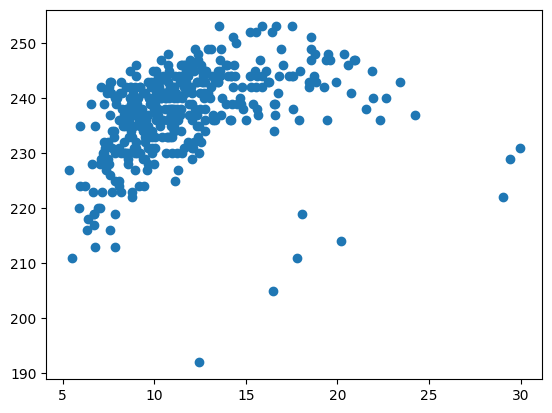

In [20]:
plt.scatter(df["revenue_per_student"], df["AVG_MATH_4_SCORE"])
plt.show()

There exists a positively-correlated, proportional relationship between revenue per student and average math 4 score. There are also few outliers outside the cluster.

**Visualization 2**

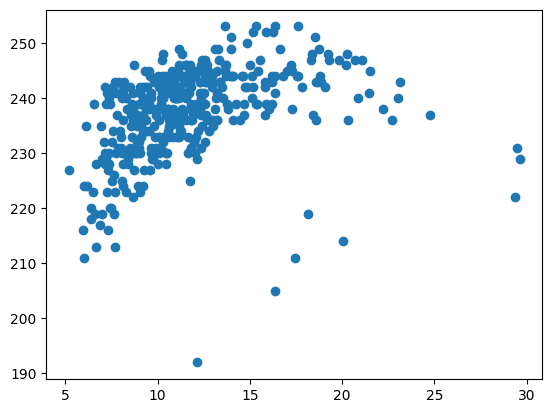

In [21]:
plt.scatter(df["expenditure_per_student"], df["AVG_MATH_4_SCORE"])
plt.show()

There also exists a positively-correlated and proportioinal relationship between expenditure per student and average math 4 scores, as well as a few outliers. The data suggests that revenue per student also strongly correlate with expenditure per student given their similar distribution.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [29]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 29.6 MB/s eta 0:00:00


In [32]:
X = df[['revenue_per_student', 'expenditure_per_student']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [35]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [42]:
print(model.score(X_test, y_test))               # R2 score
print(np.mean(np.abs(y_pred - y_test)))          # mean absolute error
print(np.sqrt(np.mean((y_pred - y_test) ** 2)))  # mean squared error

0.1142858330819354
5.77471747627069
8.142485643630172


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

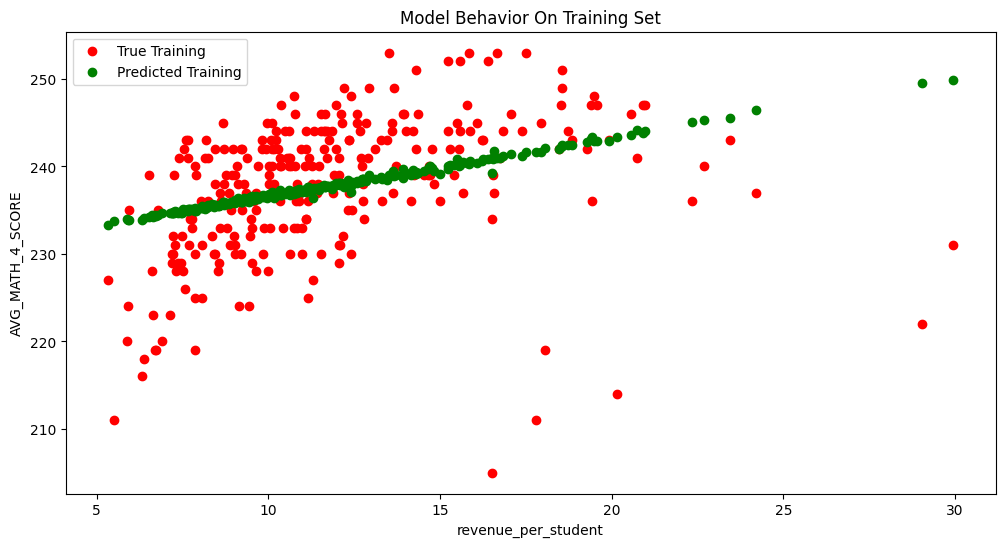

In [44]:
col_name = 'revenue_per_student'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

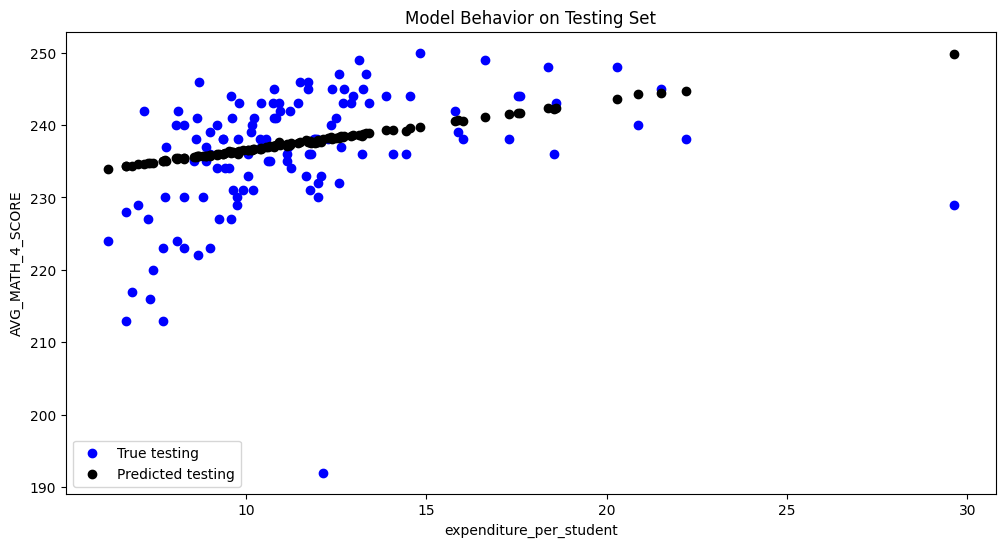

In [46]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing', 'Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")